In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import tensorflow as tf
tf.__version__


'2.5.0'

In [2]:
# cv2.imshow('image-resized window', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)

### From previous file 01

In [2]:
directory = 'homer_bart_1'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]

height, width = 128, 128

images = []
classes = []

for image_path in files:
    #print(image_path)
    try:
        image = cv2.imread(image_path)
        (H, W) = image.shape[:2]
    except: 
        continue
        
    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Use `ravel()` to flatten the array
    image = image.ravel()
    
    images.append(image)
    
    
    image_name = os.path.basename(os.path.normpath(image_path))
    
    if image_name.startswith('b'):
        class_name = 0
    else:
        class_name = 1
    classes.append(class_name)
    

In [3]:
X = np.asarray(images)
y = np.asarray(classes)

In [4]:
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109]))

## Normalizing data

In [5]:
X[0].min(), X[0].max() 

(0, 255)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
X[0].max(), X[0].min()

(1.0000000000000002, 0.0)

## Train and Test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [10]:
X_train.shape, y_train.shape

((215, 16384), (215,))

In [11]:
X_test.shape, y_test.shape

((54, 16384), (54,))

## Building and Training the NN

In [12]:
network1 = tf.keras.models.Sequential()

In [13]:
(16384 + 2) / 2 # Numer of units in the hidden layer

8193.0

In [14]:
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [15]:
network1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8193)              134242305 
_________________________________________________________________
dense_1 (Dense)              (None, 8193)              67133442  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8194      
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [28]:
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = network1.fit(X_train, y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 6s 760ms/step - loss: 0.6965 - accuracy: 0.4791
Epoch 2/50
7/7 [==============================] - 5s 714ms/step - loss: 0.6586 - accuracy: 0.7535
Epoch 3/50
7/7 [==============================] - 5s 784ms/step - loss: 0.5944 - accuracy: 0.6558
Epoch 4/50
7/7 [==============================] - 6s 809ms/step - loss: 0.5384 - accuracy: 0.7907
Epoch 5/50
7/7 [==============================] - 5s 765ms/step - loss: 0.4787 - accuracy: 0.7860
Epoch 6/50
7/7 [==============================] - 5s 736ms/step - loss: 0.4409 - accuracy: 0.8465
Epoch 7/50
7/7 [==============================] - 6s 838ms/step - loss: 0.4642 - accuracy: 0.8233
Epoch 8/50
7/7 [==============================] - 6s 914ms/step - loss: 0.4121 - accuracy: 0.8419
Epoch 9/50
7/7 [==============================] - 6s 830ms/step - loss: 0.2950 - accuracy: 0.9256
Epoch 10/50
7/7 [==============================] - 5s 776ms/step - loss: 0.3261 - accuracy: 0.8884
Epoch 11/50
7/7 [==

## Evaluating the NN

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

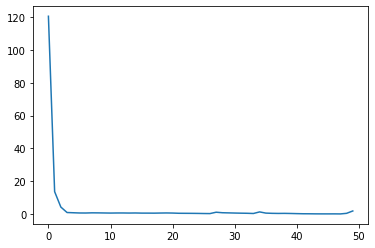

In [19]:
plt.plot(history.history['loss']);

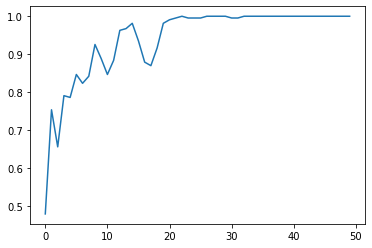

In [31]:
plt.plot(history.history['accuracy']);

In [32]:
X_test.shape

(54, 16384)

In [37]:
predictions = network1.predict(X_test)
predictions # It shows probablities which we have to convert into classes

array([[4.55617905e-04],
       [9.95184541e-01],
       [4.56231833e-03],
       [1.81866884e-02],
       [7.21885622e-01],
       [8.04364681e-04],
       [9.95093584e-01],
       [9.60370302e-01],
       [1.14554971e-01],
       [8.83292198e-01],
       [1.52248144e-03],
       [9.95200336e-01],
       [8.77891541e-01],
       [7.34768152e-01],
       [1.32660866e-02],
       [1.56408548e-03],
       [1.13554984e-01],
       [4.32831258e-01],
       [4.61646914e-03],
       [4.43369150e-04],
       [4.05825995e-05],
       [9.06601071e-01],
       [7.01725483e-04],
       [8.00082088e-03],
       [2.62492895e-03],
       [9.76268470e-01],
       [1.55967474e-03],
       [1.53476000e-03],
       [5.69325686e-03],
       [9.63285446e-01],
       [2.04626948e-01],
       [9.95200336e-01],
       [8.56234372e-01],
       [1.15810239e-04],
       [9.95124340e-01],
       [1.06003881e-03],
       [2.90663242e-01],
       [2.77698040e-04],
       [4.89985347e-02],
       [2.62379646e-04],


In [38]:
# 0 False - Bart
# 1 True - Homer

In [39]:
predictions = (predictions > 0.5)
predictions

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False]])

In [40]:
y_test # Labels to test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7037037037037037

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictibbons)
cm

array([[23,  5],
       [11, 15]])

<AxesSubplot:>

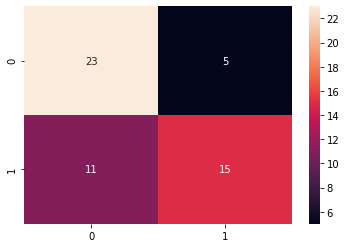

In [44]:
sns.heatmap(cm, annot=True)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74        28
           1       0.75      0.58      0.65        26

    accuracy                           0.70        54
   macro avg       0.71      0.70      0.70        54
weighted avg       0.71      0.70      0.70        54



## Saving and Loading the NN

In [48]:
# # Save
# model_json = network1.to_json()
# with open('network1.json', 'w') as json_file:
#     json_file.write(model_json)

In [49]:
## from keras.models import save_model
# network1_saved = save_model(network1, 'weights1.hdf5')

In [50]:
# # Load
# with open('network1.json') as json_file:
#     json_saved_model = json_file.read()
# json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 16384], "dtype": "float32", "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": n

In [53]:
# network1_loaded = tf.keras.models.model_from_json(json_saved_model)
# network1_loaded.load_weights('weights1.hdf5')
# network1_loaded.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [54]:
network1_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8193)              134242305 
_________________________________________________________________
dense_1 (Dense)              (None, 8193)              67133442  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8194      
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


## Classifying one single image

In [108]:
test_image = X_test[0]
test_image

array([1., 1., 1., ..., 1., 1., 1.])

In [109]:
test_image = scaler.inverse_transform(test_image.reshape(1, -1))

In [110]:
test_image

array([[255., 255., 255., ..., 255., 255., 255.]])

In [111]:
# cv2.imshow(' ', test_image.reshape(width, height))
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)

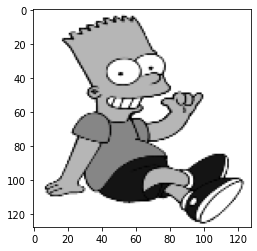

In [112]:
plt.imshow(test_image.reshape(128, 128), cmap='gray');

In [113]:
network1_loaded.predict(test_image)[0][0]

0.0

In [114]:
if network1_loaded.predict(test_image)[0][0] < 0.5:
    print('Bart')
else:
    print('Homer')

Bart
